# Load Items

In [2]:
import sys

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import numpy as np
import pandas as pd

sys.path.insert(0, '../preprocess')

import condense_csv

pd.set_option('display.max_columns', 100)
sns.set(color_codes=True)

In [3]:
train_X = pd.read_csv('../data/train.csv')
train_y = pd.read_csv('../data/train_labels.csv')  
train_X = condense_csv.compress_X(train_X)
train_y = condense_csv.compress_labels(train_y)

memory used before preprocess:  19.00808

date time size before: 3.9798799999999996
date time size after:  0.47528 

converting funder                         size:  3.86	->	 0.33
converting installer                      size:  3.64	->	 0.34
converting basin                          size:  4.03	->	 0.06
converting subvillage                     size:  3.85	->	 2.03
converting region                         size:  3.78	->	 0.06
converting lga                            size:  3.83	->	 0.07
converting ward                           size:  3.83	->	 0.34
converting public_meeting                 size:  2.1	->	 0.06
converting recorded_by                    size:  4.75	->	 0.06
converting scheme_management              size:  3.55	->	 0.06
converting scheme_name                    size:  3.15	->	 0.4
converting permit                         size:  2.06	->	 0.06
converting extraction_type                size:  3.84	->	 0.06
converting extraction_type_group          size:  3.85	->	 0.06
con

In [4]:
train_X['status_group'] = train_y['status_group'].values
train_X.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# Functions

In [8]:
def num_corr_matrix(dfx):
    """
    Create a lower triangular correlation plot.
    
    :param dfx: dataframe
    :type  dfx: pandas.core.frame.DataFrame
    """
    
    corr = dfx.corr()
    
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(20, 20))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
    
    
def joint_plot(x, y):
    """
    Plot a joint plot (density grid)

    :param x: x values
    :type  x: str
    :param y: y values
    :type  y: str
    """

    g = sns.jointplot(x=x, y=y, data=train_X, kind="kde", color="m")
    g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
    g.ax_joint.collections[0].set_alpha(0)
    g.set_axis_labels("$X$", "$Y$")
    plt.plot()


def hex_bin(x, y):
    """
    Plot a hex plot

    :param x: x values
    :type  x: str
    :param y: y values
    :type  y: str
    """
    
    sns.jointplot(x=x, y=y, data=train_X, kind="hex")


def hex_and_joint_plot(x, y):
    """
    Plot a hex plot and a joint plot

    :param x: x values
    :type  x: str
    :param y: y values
    :type  y: str
    """
 
    hex_bin(x, y)
    joint_plot(x, y)

# Correlation HeatMap

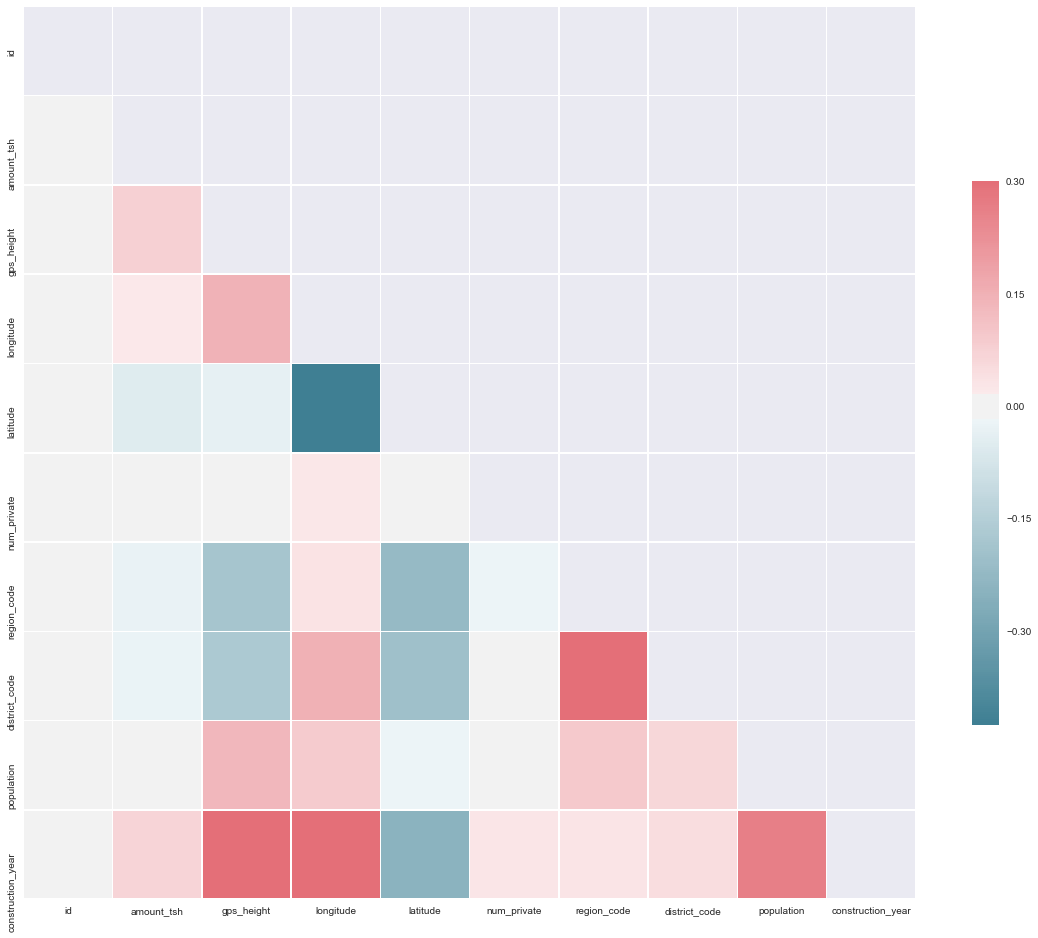

In [5]:
num_corr_matrix(train_X)

In [41]:
"""
Notes:

I will consider the binary correlations that are significant 
(the ones that are dark red or dark blue).

Latitude vs. Longitude: not meaningful
district code vs region code: not meaningful
"""
print('')

## Construction Year vs GPS Height

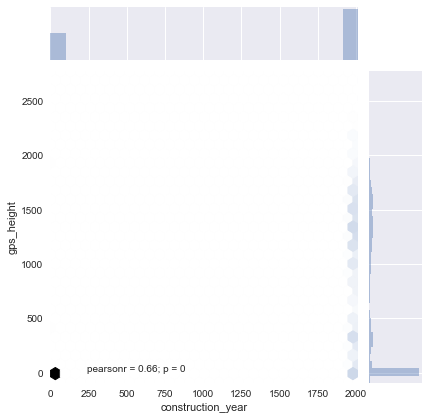

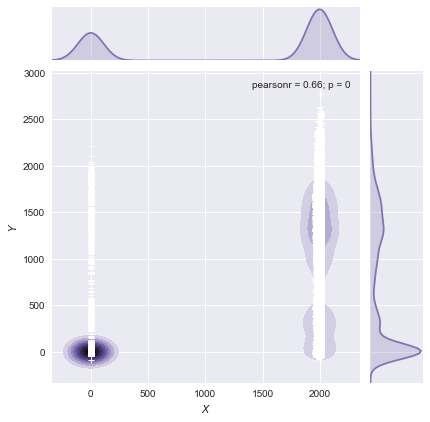

In [9]:
hex_and_joint_plot("construction_year", "gps_height")

In [10]:
"""
Notes:

The plot doesn't have too much meaning because there are zeros for missing values
"""
print('')

## Longitude vs Construction Year

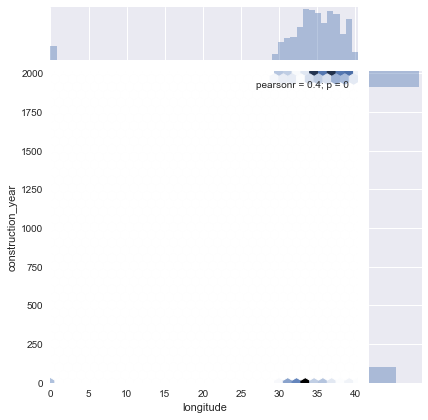

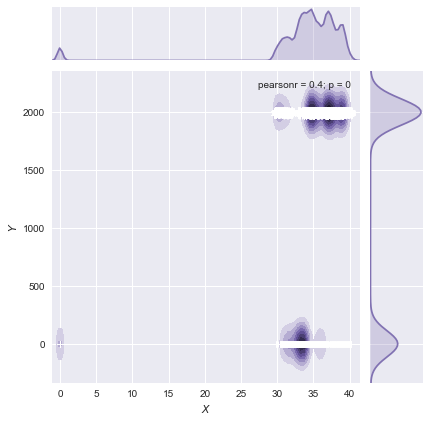

In [59]:
hex_and_joint_plot("longitude", "construction_year")

# Pair Plots

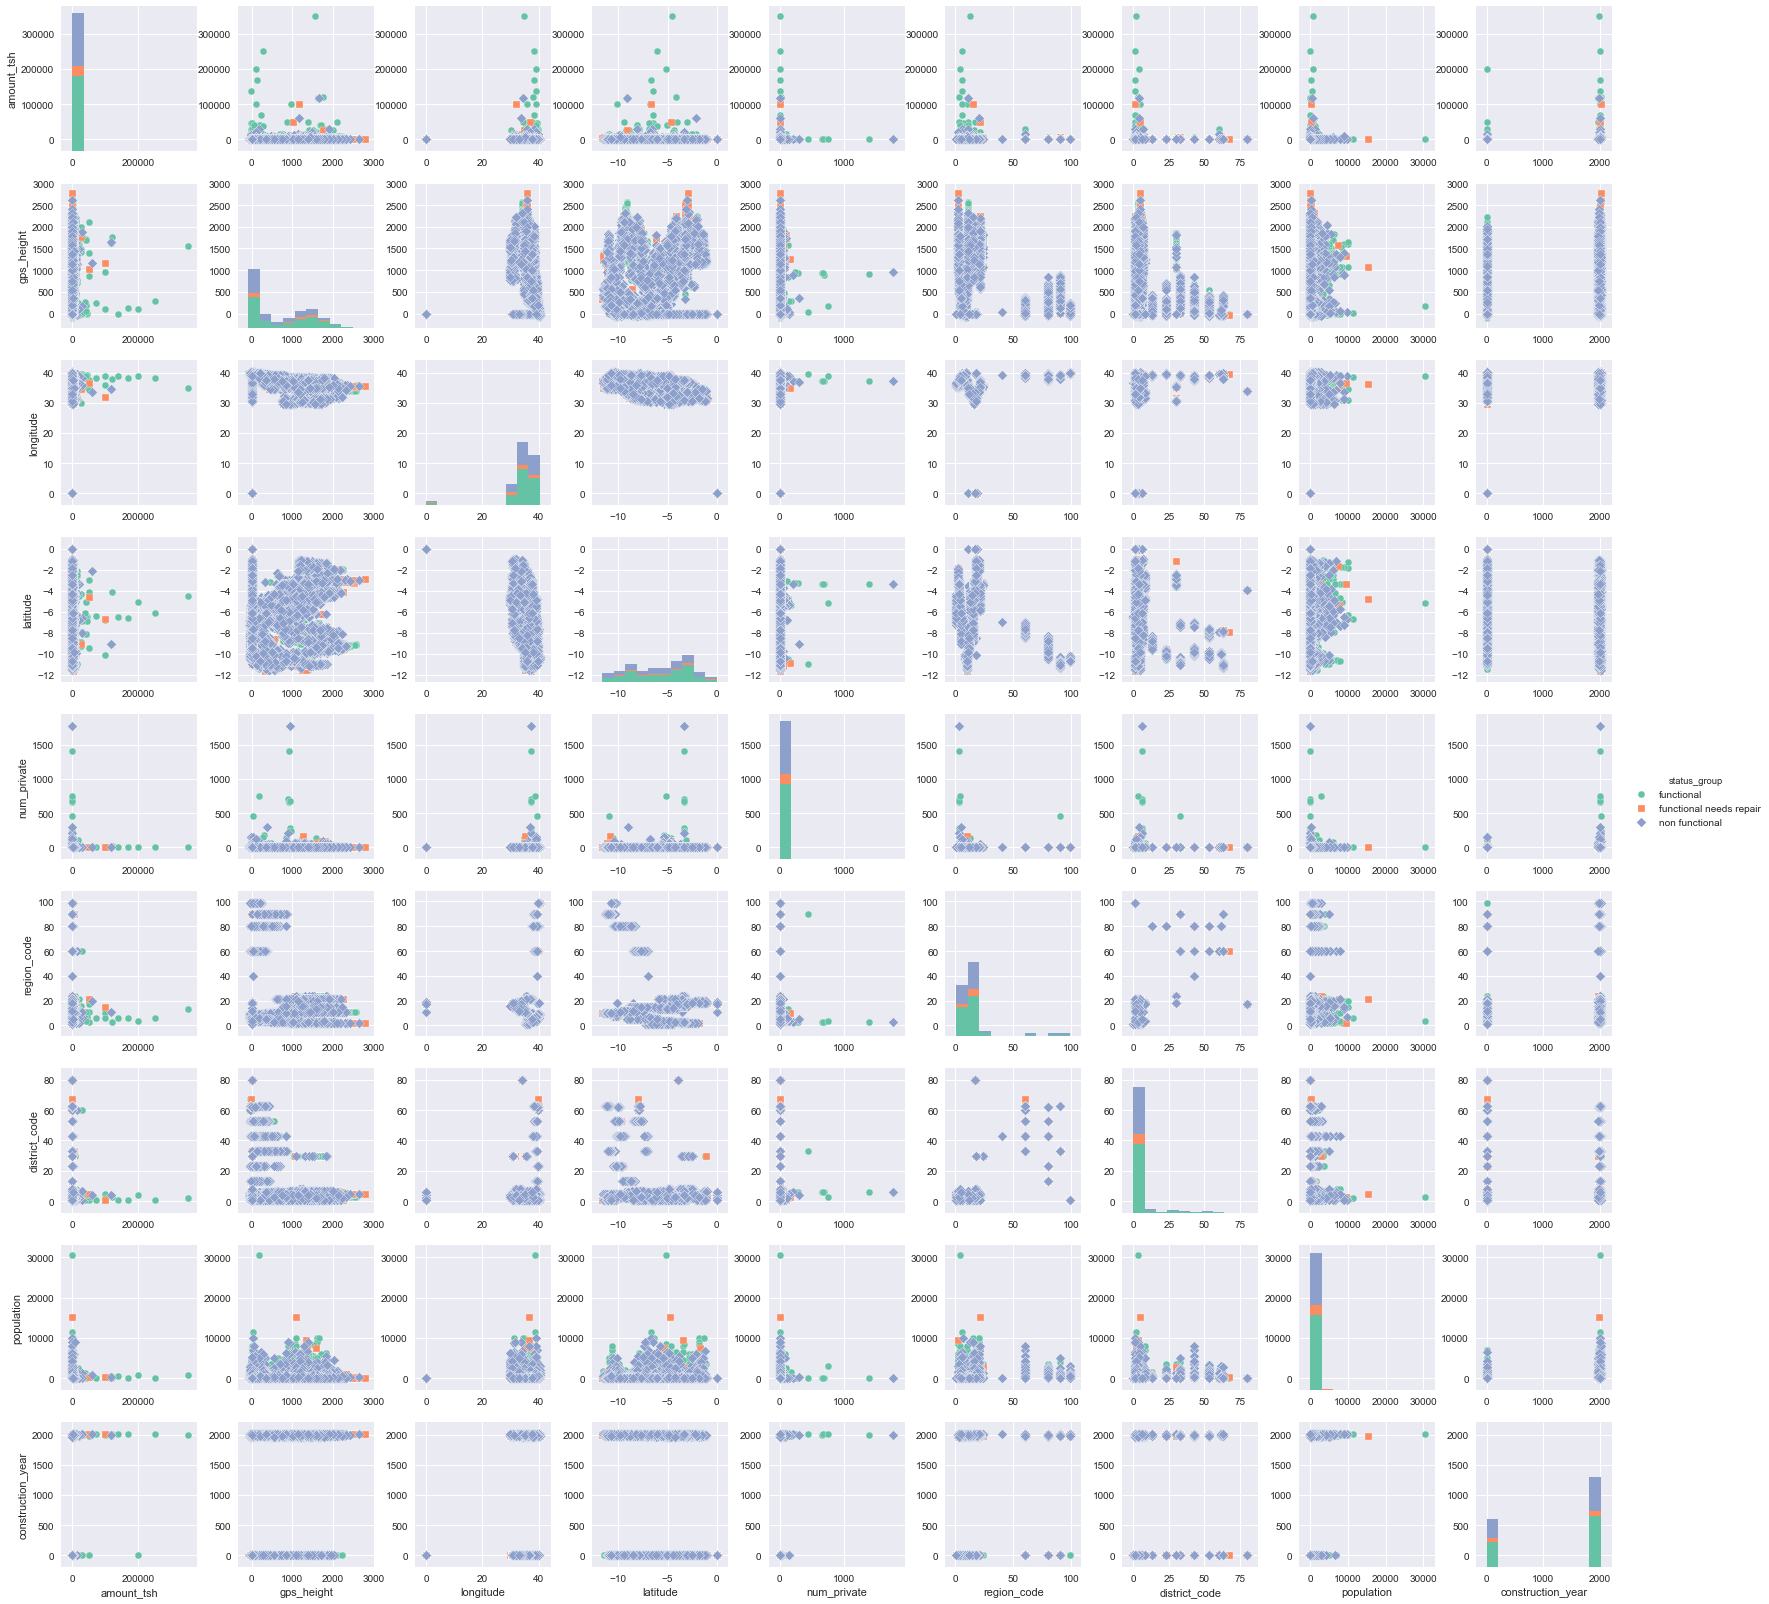

In [36]:
num_cols = train_X.select_dtypes(
    include=['int8', 'int16', 'int32', 'float64']).columns.drop('id')

plt.figure(
    figsize=(25,25)
)
sns.pairplot(
    train_X,
    vars=num_cols,
    hue='status_group',
    palette="Set2",
    kind="scatter",
    markers=["o", "s", "D"],
)

plt.show()

In [40]:
#countour line pairplots
#takes too long to create
# g = sns.PairGrid(train_X.select_dtypes(
#     include=['int8', 'int16', 'int32', 'float64']))
# g.map_diag(sns.kdeplot)
# g.map_offdiag(sns.kdeplot, n_levels=6)
# plt.show()